In [1]:
import numpy as np
np.int = int  # Fix for compatibility with older versions of scikit-learn

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
%matplotlib inline

digits = load_digits()


In [3]:
print("image data shape",digits.data.shape)
print("label data shape",digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


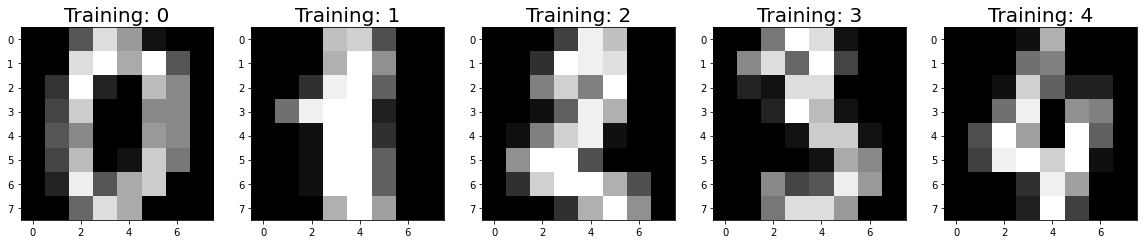

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

plt.figure(figsize=(20, 15))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20)


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target,test_size=0.20,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [9]:
import numpy as np
np.float = float  # Temporary fix for deprecated np.float usage

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)
print(logisticRegr.predict(x_test[0].reshape(1, -1)))  # Correct reshape
print(logisticRegr.predict(x_test[0:10]))
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

[4]
[4 0 9 1 8 7 1 5 1 6]
0.9416666666666667


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  2  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 40  0  0  0  1]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  1  0  0  0 34  1]
 [ 0  0  0  0  0  1  0  0  1 26]]


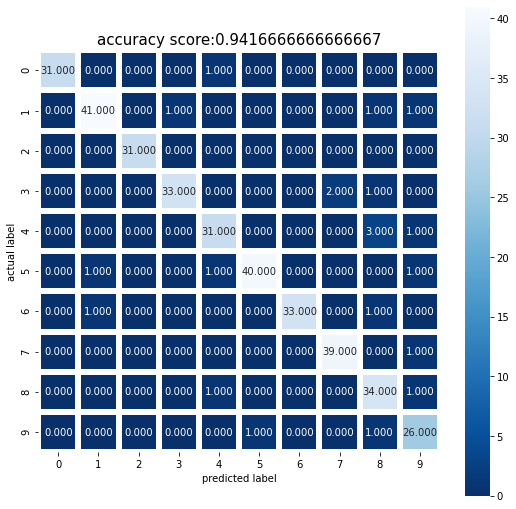

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=5,square=True,cmap="Blues_r");
plt.ylabel("actual label")
plt.xlabel("predicted label")
all_sample_title="accuracy score:{0}".format(score)
plt.title(all_sample_title,size=15);

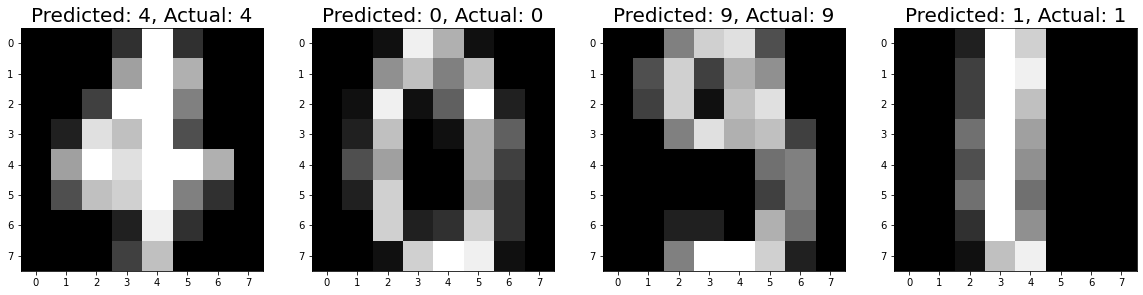

In [12]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20, 5))
for plotIndex, correct in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[correct], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[correct], y_test[correct]), fontsize=20)
plt.show()